In [1]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 22.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from IPython.display import HTML, display
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier  #
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [3]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil


In [8]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 10.5 MB/s eta 0:00:00


In [9]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier
)
from optuna.samplers import TPESampler
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import optuna
import pickle
import shutil
import os

In [10]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

In [76]:
df_train = pd.read_csv('./train.csv')
df_test  = pd.read_csv('./test.csv')
submission = pd.read_csv('./sample_submission.csv')
# #droping id
df_train.drop(columns=['id'], inplace=True)
df_test.drop(columns=['id'], inplace=True)

In [98]:
df_train

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,1,1,3,9500,1,1,131.0,1,19,3,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,1,1,2,9500,1,1,132.0,1,19,37,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,1,17,1,9254,1,1,121.0,1,19,1,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,1,1,6,9254,1,1,125.0,1,1,38,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
76515,5,17,1,9085,1,1,138.0,1,37,37,...,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled
76516,1,1,3,9070,1,1,136.0,1,38,37,...,0,6,0,0,0.000000,0,7.6,2.6,0.32,Dropout


In [99]:
df_test

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,1,9500,1,1,141.0,1,3,1,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,1,1,1,9238,1,1,128.0,1,1,19,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,1,1,1,9238,1,1,118.0,1,1,19,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,1,44,1,9147,1,39,130.0,1,1,19,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,1,39,1,9670,1,1,110.0,1,1,37,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,1,1,2,171,1,1,128.0,1,38,37,...,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
51008,2,39,1,9119,1,19,133.1,1,19,37,...,0,0,5,5,0,0.000000,0,9.4,-0.8,-3.12
51009,1,1,1,171,1,1,127.0,1,1,1,...,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
51010,1,1,3,9773,1,1,132.0,1,19,19,...,0,0,6,9,3,13.000000,0,7.6,2.6,0.32


In [23]:
null_counts = df_train.isnull().sum()

# 결측치가 있는 열 찾기
columns_with_null = null_counts[null_counts > 0].index.tolist()

# 결측치가 있는 열과 해당 열의 결측치 개수 출력
for column in columns_with_null:
    print(f"Column '{column}': {null_counts[column]} null values")

In [ ]:
# 중복된 행 확인
duplicate_rows = df_train.duplicated()

# 중복된 행의 개수
duplicate_count = duplicate_rows.sum()

if duplicate_count == 0:
    print("No duplicate rows in the dataset.")
else:
    print(f"There are {duplicate_count} duplicate rows in the dataset.")

No duplicate rows in the dataset.


In [ ]:
summary = df_train.describe(include='all')  # 모든 열에 대한 통계 정보 포함
print(summary)

        Marital status  Application mode  Application order        Course  \
count     76518.000000      76518.000000       76518.000000  76518.000000   
unique             NaN               NaN                NaN           NaN   
top                NaN               NaN                NaN           NaN   
freq               NaN               NaN                NaN           NaN   
mean          1.111934         16.054419           1.644410   9001.286377   
std           0.441669         16.682337           1.229645   1803.438531   
min           1.000000          1.000000           0.000000     33.000000   
25%           1.000000          1.000000           1.000000   9119.000000   
50%           1.000000         17.000000           1.000000   9254.000000   
75%           1.000000         39.000000           2.000000   9670.000000   
max           6.000000         53.000000           9.000000   9991.000000   

        Daytime/evening attendance  Previous qualification  \
count        

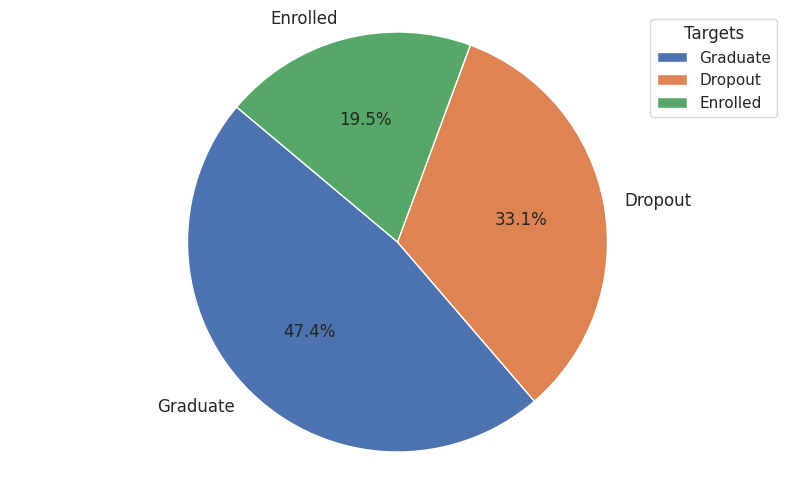

In [ ]:
data = df_train['Target'].value_counts()
labels = data.index
sizes = data.values

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(sizes,  labels=labels,  autopct='%1.1f%%', startangle=140)

plt.setp(texts, size=12)
plt.setp(autotexts, size=12)

ax.legend(wedges, labels, title="Targets")

ax.axis('equal')

plt.show()


In [ ]:
df_train['Target'].unique()

array(['Graduate', 'Dropout', 'Enrolled'], dtype=object)

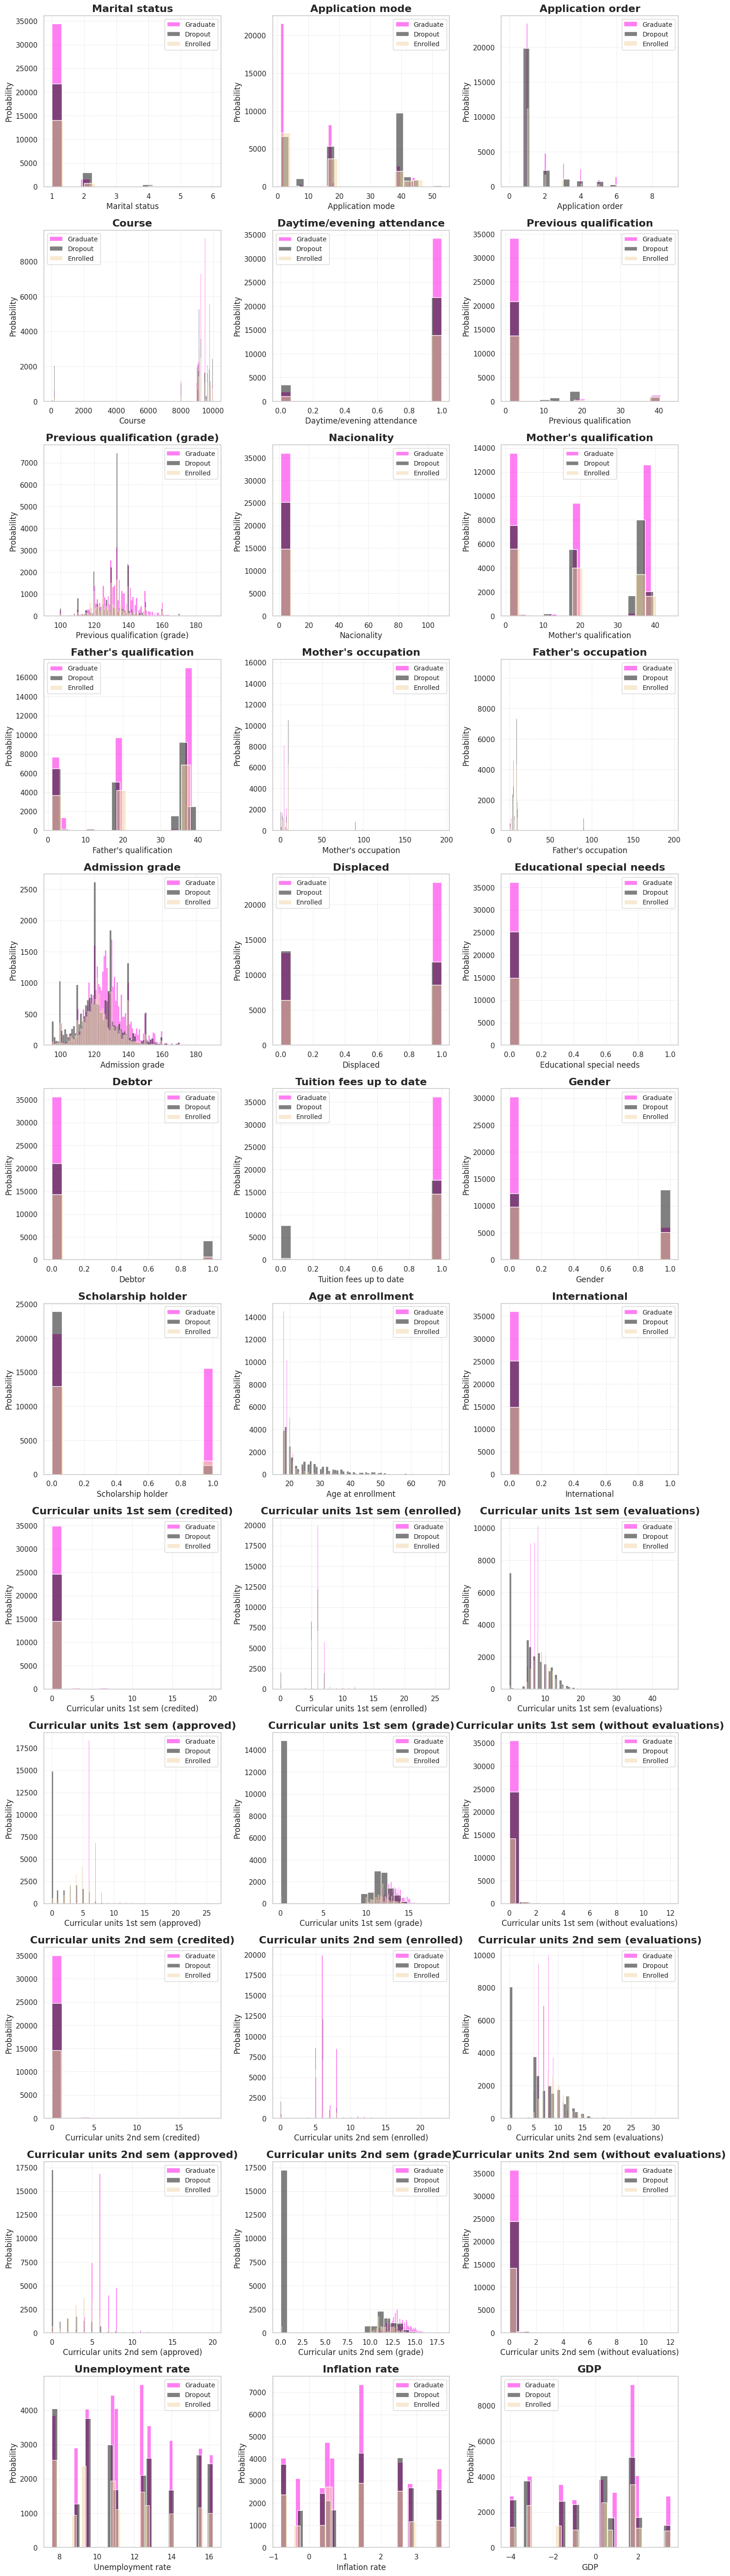

In [ ]:
colors = ['#ff00e6', '#030303', '#f2d5a5']
sns.set(style="whitegrid")
fig = plt.figure(figsize=(15, 60))
i = 1
for label in df_train.drop('Target', axis=1).columns:
    plt.subplot(13, 3, i)
    for idx, target in enumerate(df_train['Target'].unique()):
        sns.histplot(df_train[df_train['Target'] == target][label], color=colors[idx], label=target, alpha=0.5)
    plt.title(label, fontsize=16, fontweight='bold')
    plt.xlabel(label, fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    i += 1

plt.tight_layout()
plt.show()


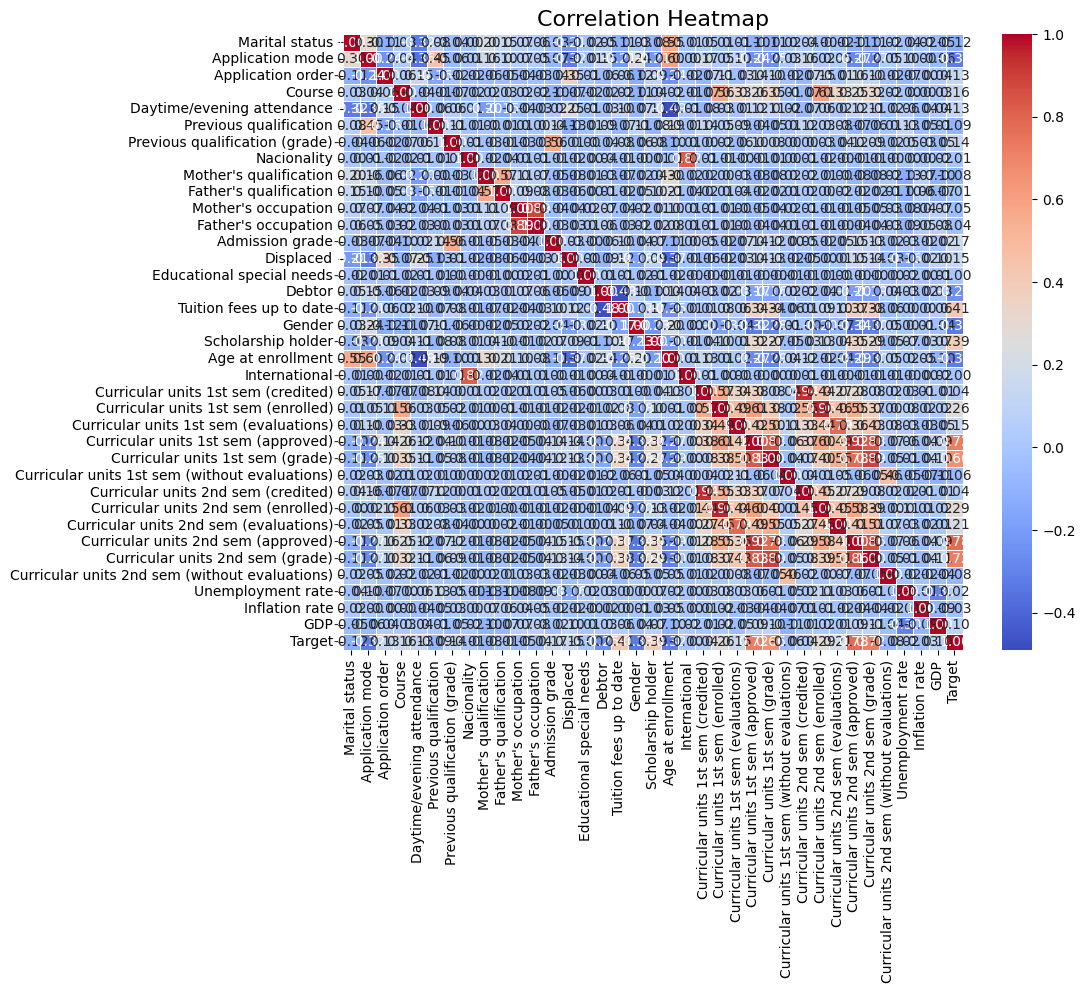

In [14]:
from sklearn.preprocessing import LabelEncoder
df_train2 = df_train.copy()
# LabelEncoder를 사용하여 'Education' 열을 숫자형으로 변환
label_encoder = LabelEncoder()
df_train2['Target'] = label_encoder.fit_transform(df_train['Target'])

corr_matrix = df_train2.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [ ]:
threshold = 0.65

# Target 열과의 상관 행렬 추출
target_corr = corr_matrix['Target'].drop('Target')  # 자기 자신과의 상관 관계 제외

# 임계값 이상인 상관 계수를 가진 열 추출
high_corr_cols = target_corr[abs(target_corr) > threshold].index.tolist()

print("Columns with correlation coefficient higher than", threshold, "with Target:")
print(high_corr_cols)


Columns with correlation coefficient higher than 0.65 with Target:
['Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']


In [ ]:

def model_test(train_df, test_df, threshold, n_estimators_size, min_samples_split_size) :

    df_train2 = train_df.copy()
    df_train2['Target'] = label_encoder.fit_transform(df_train['Target'])
    df_test = test_df.copy()
    corr = df_train2.corr()
    drop_cols = []

    for label in df_train2.drop('Target', axis=1).columns:
        correlation = corr[label].abs()[-1]
        if correlation < threshold:
            drop_cols.append(label)

    df_train2 = df_train2.drop(drop_cols, axis=1)
    df_test = df_test.drop(drop_cols, axis=1)

    # models
    model1 = RandomForestClassifier(n_estimators=n_estimators_size, min_samples_split=min_samples_split_size)
    model2 = CatBoostClassifier(verbose=False, iterations=10000, use_best_model=True)
    model3 = XGBClassifier()
    model4 = LGBMClassifier()

    models = [model1, model2, model3, model4]

    MODELS = []
    accuracy_score_list = []

    X_train, X_val, y_train, y_val = train_test_split(df_train2.drop('Target', axis=1), df_train2['Target'], test_size=0.2, random_state=42)

    for model in models:
        try:
            # Train the model
            model.fit(X_train, y_train, eval_set=(X_val, y_val))
        except:
            model.fit(X_train, y_train)

        y_pred = model.predict(X_val)
        print(f'Model Name: {model.__class__.__name__}, score : ', accuracy_score(y_val, y_pred),'\n')
        #print(accuracy_score(y_val, y_pred))
        accuracy_score_list.append(accuracy_score(y_val, y_pred))
        max_index = accuracy_score_list.index(max(accuracy_score_list))
        MODELS.append(model)

    final_model = MODELS[max_index]

    y_pred = final_model.predict(df_test)

    y_pred_0 = MODELS[0].predict(df_test)
    y_pred_1 = MODELS[1].predict(df_test)
    y_pred_2 = MODELS[2].predict(df_test)
    y_pred_3 = MODELS[3].predict(df_test)

    preds = pd.DataFrame({
        'Model_0': y_pred_0,
        'Model_1': np.ravel(y_pred_1),
        'Model_2': y_pred_2,
        'Model_3': y_pred_3
    })
    blend_preds = preds.mode(axis=1)
    blend_preds = blend_preds.iloc[:, 0].astype(int)
    blend_preds = label_encoder.inverse_transform(blend_preds)

    ensemble_submission = pd.DataFrame({
        'id': submission['id'],
        'Target': blend_preds
    })

    # CSV 파일로 저장
    ensemble_submission.to_csv('ensemble_blend_submission_{}_{}_{}.csv'.format(threshold, n_estimators_size, min_samples_split_size), index=False)

    if y_pred.ndim == 2:
        y_pred = y_pred.reshape(-1)
    y_pred = pd.Series(y_pred)

    y_pred = label_encoder.inverse_transform(y_pred)

    one_submission = pd.DataFrame({
        'id': submission['id'],
        'Target': y_pred
    })
    one_submission.to_csv('submission_{}_{}_{}.csv'.format(threshold, n_estimators_size, min_samples_split_size), index=False)




In [ ]:
"""
thresholds = [0.05, 0.07, 0.1, 0.12]
n_estimators_sizes = [150, 200, 250]
min_samples_split_sizes = [2, 3, 4]

for threshold in thresholds:
    for n_estimators_size in n_estimators_sizes:
        for min_samples_split_size in min_samples_split_sizes:
            model_test(df_train, df_test, threshold, n_estimators_size, min_samples_split_size)
"""

'\nthresholds = [0.05, 0.07, 0.1, 0.12]\nn_estimators_sizes = [150, 200, 250]\nmin_samples_split_sizes = [2, 3, 4]\n\nfor threshold in thresholds:\n    for n_estimators_size in n_estimators_sizes:\n        for min_samples_split_size in min_samples_split_sizes:\n            model_test(df_train, df_test, threshold, n_estimators_size, min_samples_split_size)\n'

In [ ]:
import multiprocessing

thresholds = [0.05, 0.07, 0.1, 0.12]
n_estimators_sizes = [150, 200, 250]
min_samples_split_sizes = [2, 3, 4]

def process_model(threshold, n_estimators_size, min_samples_split_size):
    model_test(df_train, df_test, threshold, n_estimators_size, min_samples_split_size)

if __name__ == "__main__":
    processes = []
    for threshold in thresholds:
        for n_estimators_size in n_estimators_sizes:
            for min_samples_split_size in min_samples_split_sizes:
                process = multiprocessing.Process(target=process_model, args=(threshold, n_estimators_size, min_samples_split_size))
                process.start()
                processes.append(process)

    for process in processes:
        process.join()


Model Name: RandomForestClassifier, score :  0.8263852587558809 

Model Name: RandomForestClassifier, score :  0.8243596445373759 

Model Name: RandomForestClassifier, score :  0.827038682697334 

Model Name: RandomForestClassifier, score :  0.8236408782017773 

Model Name: RandomForestClassifier, score :  0.821549921589127 

Model Name: RandomForestClassifier, score :  0.825209095661265 

Model Name: RandomForestClassifier, score :  0.825601150026137 

Model Name: RandomForestClassifier, score :  0.8269079979090433 

Model Name: RandomForestClassifier, score :  0.8273000522739153 

Model Name: RandomForestClassifier, score :  0.8261892315734448 

Model Name: RandomForestClassifier, score :  0.8267773131207528 

Model Name: RandomForestClassifier, score :  0.8265159435441715 

Model Name: RandomForestClassifier, score :  0.8264506011500261 

Model Name: RandomForestClassifier, score :  0.8237062205959227 

Model Name: RandomForestClassifier, score :  0.8216806063774177 

Model Name: Ra

In [11]:
class Trainer:
    def __init__(self, model, n_folds=5):
        self.model = model
        self.n_folds = n_folds

    def fit(self, X, y):
        print(f'Training {self.model.__class__.__name__}')

        rskf = StratifiedKFold(n_splits=self.n_folds, random_state=27, shuffle=True)

        accs = []
        aucs = []
        oof_pred_probs = np.zeros((X.shape[0], len(np.unique(y))))
        oof_preds = np.zeros(X.shape[0])
        for fold_idx, (train_idx, val_idx) in enumerate(rskf.split(X, y)):
            X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]


            y_pred_probs = self.model.predict_proba(X_val)
            y_pred = np.argmax(y_pred_probs, axis=1)

            oof_pred_probs[val_idx] = y_pred_probs
            oof_preds[val_idx] = y_pred

            acc = accuracy_score(y_val, y_pred)
            auc = roc_auc_score(y_val, y_pred_probs, multi_class='ovo')
            accs.append(acc)
            aucs.append(auc)

            print(f'--- Fold {fold_idx + 1} - Accuracy: {acc:.6f}, AUC: {auc:.6f}')

        print(f'\n------ Accuracy: {np.mean(accs):.6f} ± {np.std(accs):.6f}')
        print(f'------ AUC:      {np.mean(aucs):.6f} ± {np.std(aucs):.6f}\n\n')

        return self.model, oof_pred_probs, oof_preds, accs, aucs

In [80]:
X_train.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Mother's qualification                            0
Admission grade                                   0
Displaced                                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
Curricular units 1st sem (enrolled)               0
Curricular units 1st sem (evaluations)            0
Curricular units 1st sem (approved)               0
Curricular units 1st sem (grade)                  0
Curricular u

In [31]:
df_train2

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's qualification,Admission grade,Displaced,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),GDP,Target
0,1,1,1,9238,1,1,126.0,1,122.6,0,...,6,14.500000,0,6,7,6,12.428571,0,2.02,2
1,1,17,1,9238,1,1,125.0,19,119.8,1,...,4,11.600000,0,6,9,0,0.000000,0,2.02,0
2,1,17,2,9254,1,1,137.0,3,144.7,0,...,0,0.000000,0,6,0,0,0.000000,0,-0.92,0
3,1,1,3,9500,1,1,131.0,19,126.1,1,...,7,12.591250,0,8,11,7,12.820000,0,2.02,1
4,1,1,2,9500,1,1,132.0,19,120.1,1,...,6,12.933333,0,7,12,6,12.933333,0,0.32,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,1,17,1,9254,1,1,121.0,19,116.5,1,...,6,10.666667,0,6,8,5,10.600000,0,0.79,2
76514,1,1,6,9254,1,1,125.0,1,131.6,1,...,4,13.000000,0,6,9,6,13.875000,0,-3.12,2
76515,5,17,1,9085,1,1,138.0,37,123.3,1,...,4,12.500000,2,5,8,5,11.400000,1,-3.12,1
76516,1,1,3,9070,1,1,136.0,38,124.8,1,...,0,0.000000,0,6,0,0,0.000000,0,0.32,0


In [35]:
df_test2

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's qualification,Admission grade,Displaced,...,Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),GDP
0,1,1,1,9500,1,1,141.0,3,152.1,0,...,0,0,0.000000,0,8,0,0,0.000000,0,0.79
1,1,1,1,9238,1,1,128.0,1,116.5,0,...,7,6,14.857143,0,6,6,6,13.500000,0,2.02
2,1,1,1,9238,1,1,118.0,1,114.2,0,...,11,6,12.000000,0,6,11,5,11.000000,0,-4.06
3,1,44,1,9147,1,39,130.0,1,130.0,0,...,15,5,11.500000,0,8,14,5,11.000000,0,3.51
4,1,39,1,9670,1,1,110.0,1,106.0,1,...,9,3,11.000000,0,6,9,4,10.666667,2,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,1,1,2,171,1,1,128.0,38,124.7,1,...,0,0,0.000000,0,0,0,0,0.000000,0,-4.06
51008,2,39,1,9119,1,19,133.1,19,140.0,0,...,6,0,0.000000,0,5,5,0,0.000000,0,-3.12
51009,1,1,1,171,1,1,127.0,1,120.4,0,...,0,0,0.000000,0,0,0,0,0.000000,0,-4.06
51010,1,1,3,9773,1,1,132.0,19,126.3,1,...,8,5,12.600000,0,6,9,3,13.000000,0,0.32


In [119]:
df_train = pd.read_csv('/content/train.csv')
df_test  = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/sample_submission.csv')
# #droping id
df_train.drop(columns=['id'], inplace=True)
df_test.drop(columns=['id'], inplace=True)

In [121]:

train_df = df_train
test_df = df_test
threshold = 0.05
n_estimators_size = 200
min_samples_split_size = 4

accuracies = {}
aucs = {}

test_pred_probs = {}
oof_pred_probs = {}
oof_preds = {}

label_encoder = LabelEncoder()




df_train2 = train_df.copy()
df_test2 = test_df.copy()
df_train2['Target'] = label_encoder.fit_transform(df_train['Target'])
df_test = test_df.copy()
'''
corr = df_train2.corr()
drop_cols = []

for label in df_train2.drop('Target', axis=1).columns:
        correlation = corr[label].abs()[-1]
        if correlation < threshold:
            drop_cols.append(label)

df_train2 = df_train2.drop(drop_cols, axis=1)
df_test = df_test2.drop(drop_cols, axis=1)
'''

"\ncorr = df_train2.corr()\ndrop_cols = []\n\nfor label in df_train2.drop('Target', axis=1).columns:\n        correlation = corr[label].abs()[-1]\n        if correlation < threshold:\n            drop_cols.append(label)\n\ndf_train2 = df_train2.drop(drop_cols, axis=1)\ndf_test = df_test2.drop(drop_cols, axis=1)\n"

In [122]:


# models
model1 = RandomForestClassifier(n_estimators=n_estimators_size, min_samples_split=min_samples_split_size)
model2 = CatBoostClassifier(verbose=False, iterations=10000, use_best_model=True)
model3 = XGBClassifier()
model4 = LGBMClassifier()

models = [model1, model2, model3, model4]

MODELS = []
accuracy_score_list = []

X_train, X_val, y_train, y_val = train_test_split(df_train2.drop('Target', axis=1), df_train2['Target'], test_size=0.3, random_state=42)

X = df_train2.drop('Target', axis=1)
y = df_train2['Target']





for model in models:

    rskf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

    for fold_idx, (train_idx, val_idx) in enumerate(rskf.split(X, y)):
            X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]
            try :
                model.fit(X_train, y_train)
            except :
                model.fit(X_train, y_train, eval_set=(X_val, y_val))
    '''
    try:
            # Train the model
        model.fit(X_train, y_train, eval_set=(X_val, y_val))
    except:
        model.fit(X_train, y_train)
'''
    y_pred = model.predict(X_val)
    print(f'Model Name: {model.__class__.__name__}, score : ', accuracy_score(y_val, y_pred),'\n')
    #print(accuracy_score(y_val, y_pred))
    accuracy_score_list.append(accuracy_score(y_val, y_pred))
    max_index = accuracy_score_list.index(max(accuracy_score_list))
    MODELS.append(model)

final_model = MODELS[max_index]

y_pred = final_model.predict(df_test)

y_pred_0 = MODELS[0].predict(df_test)
y_pred_1 = MODELS[1].predict(df_test)
y_pred_2 = MODELS[2].predict(df_test)
y_pred_3 = MODELS[3].predict(df_test)



xgb_model = MODELS[2]
xgb_model, xgb_oof_pred_probs, xgb_oof_preds, xgb_accs, xgb_aucs = Trainer(xgb_model).fit(X, y)
oof_pred_probs['XGB'] = xgb_oof_pred_probs
oof_preds['XGB'] = xgb_oof_preds
test_pred_probs['XGB'] = xgb_model.predict_proba(df_test)
accuracies['XGB'] = xgb_accs
aucs['XGB'] = xgb_aucs


cb_model = MODELS[1]
cb_model, cb_oof_pred_probs, cb_oof_preds, cb_accs, cb_aucs = Trainer(cb_model).fit(X, y)
oof_pred_probs['CB'] = cb_oof_pred_probs
oof_preds['CB'] = cb_oof_preds
test_pred_probs['CB'] = cb_model.predict_proba(df_test)
accuracies['CB'] = cb_accs
aucs['CB'] = cb_aucs


lgbm_model = MODELS[3]
lgbm_model, lgbm_oof_pred_probs, lgbm_oof_preds, lgbm_accs, lgbm_aucs = Trainer(lgbm_model).fit(X, y)
oof_pred_probs['LGBM'] = lgbm_oof_pred_probs
oof_preds['LGBM'] = lgbm_oof_preds
test_pred_probs['LGBM'] = lgbm_model.predict_proba(df_test)
accuracies['LGBM'] = lgbm_accs
aucs['LGBM'] = lgbm_aucs


rf_model = MODELS[0]
rf_model, rf_oof_pred_probs, rf_oof_preds, rf_accs, rf_aucs = Trainer(rf_model).fit(X, y)
oof_pred_probs['RF'] = rf_oof_pred_probs
oof_preds['RF'] = rf_oof_preds
test_pred_probs['RF'] = rf_model.predict_proba(df_test)
accuracies['RF'] = rf_accs
aucs['RF'] = rf_aucs








preds = pd.DataFrame({
        'Model_0': y_pred_0,
        'Model_1': np.ravel(y_pred_1),
        'Model_2': y_pred_2,
        'Model_3': y_pred_3
    })

blend_preds = preds.mode(axis=1)
blend_preds = blend_preds.iloc[:, 0].astype(int)
blend_preds = label_encoder.inverse_transform(blend_preds)

ensemble_submission = pd.DataFrame({
        'id': submission['id'],
        'Target': blend_preds
    })

    # CSV 파일로 저장
ensemble_submission.to_csv('ensemble_blend_submission_{}_{}_{}.csv'.format(threshold, n_estimators_size, min_samples_split_size), index=False)

if y_pred.ndim == 2:
        y_pred = y_pred.reshape(-1)
y_pred = pd.Series(y_pred)

y_pred = label_encoder.inverse_transform(y_pred)

one_submission = pd.DataFrame({
        'id': submission['id'],
        'Target': y_pred
    })
one_submission.to_csv('submission_{}_{}_{}.csv'.format(threshold, n_estimators_size, min_samples_split_size), index=False)




Model Name: RandomForestClassifier, score :  0.8248709403384957 

Model Name: CatBoostClassifier, score :  0.8332353133372541 

Model Name: XGBClassifier, score :  0.8318630333921453 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1369
[LightGBM] [Info] Number of data points in the train set: 61214, number of used features: 36
[LightGBM] [Info] Start training from score -1.106863
[LightGBM] [Info] Start training from score -1.633477
[LightGBM] [Info] Start training from score -0.746218
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006613 seconds.
You can set `force_row_wise=true` to

In [123]:
def objective(trial):
    xgb_weight = trial.suggest_float('xgb_weight', 0.0, 1.0)
    cb_weight = trial.suggest_float('cb_weight', 0.0, 1.0)
    lgbm_weight = trial.suggest_float('lgbm_weight', 0.0, 1.0)
    rf_weight = trial.suggest_float('rf_weight', 0.0, 1.0)

    weights = [
        xgb_weight,
        cb_weight,
        lgbm_weight,
        rf_weight
    ]
    weights /= np.sum(weights)

    pred_probs = np.zeros((X.shape[0], len(np.unique(y))))
    for model, weight in zip(oof_pred_probs.keys(), weights):
        pred_probs += oof_pred_probs[model] * weight

    preds = np.argmax(pred_probs, axis=1)

    return accuracy_score(y, preds)


sampler = TPESampler(seed=27)
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=1000)

best_weights = study.best_params
best_weights = [best_weights[f'{model}_weight'] for model in ['xgb', 'cb', 'lgbm', 'rf']]
best_weights /= np.sum(best_weights)

[I 2024-06-19 04:22:14,308] A new study created in memory with name: no-name-ae62683d-8f2b-4150-aeb3-473acc147590
[I 2024-06-19 04:22:14,318] Trial 0 finished with value: 0.8838181865704802 and parameters: {'xgb_weight': 0.4257214105188958, 'cb_weight': 0.8145837404945526, 'lgbm_weight': 0.7353972901996796, 'rf_weight': 0.8680031998797357}. Best is trial 0 with value: 0.8838181865704802.
[I 2024-06-19 04:22:14,327] Trial 1 finished with value: 0.863626859039703 and parameters: {'xgb_weight': 0.3833807728726202, 'cb_weight': 0.9794566321445206, 'lgbm_weight': 0.8931943467151353, 'rf_weight': 0.20971516975437543}. Best is trial 0 with value: 0.8838181865704802.
[I 2024-06-19 04:22:14,339] Trial 2 finished with value: 0.8819362764316893 and parameters: {'xgb_weight': 0.7418276474127408, 'cb_weight': 0.6631433191297429, 'lgbm_weight': 0.8868014614919371, 'rf_weight': 0.8580127121355462}. Best is trial 0 with value: 0.8838181865704802.
[I 2024-06-19 04:22:14,348] Trial 3 finished with value

In [124]:
print(f'Ensemble weights: {best_weights}')

Ensemble weights: [3.42007156e-05 6.74793269e-05 1.84712495e-04 9.99713607e-01]


In [125]:
ensemble_oof_pred_probs = np.zeros((X.shape[0], len(np.unique(y))))
for model, weight in zip(oof_pred_probs.keys(), best_weights):
    ensemble_oof_pred_probs += oof_pred_probs[model] * weight

ensemble_oof_preds = np.argmax(ensemble_oof_pred_probs, axis=1)
ensemble_acc = accuracy_score(y, ensemble_oof_preds)
ensemble_auc = roc_auc_score(y, ensemble_oof_pred_probs, multi_class='ovo')

oof_pred_probs['Ensemble'] = ensemble_oof_pred_probs
oof_preds['Ensemble'] = ensemble_oof_preds
accuracies['Ensemble'] = [ensemble_acc] * 5
aucs['Ensemble'] = [ensemble_auc] * 5

In [126]:
accuracies = pd.DataFrame(accuracies)
aucs = pd.DataFrame(aucs)

In [136]:
final_pred_probs = np.zeros((df_test.shape[0], len(np.unique(y))))
for model, weight in zip(test_pred_probs.keys(), best_weights):
    final_pred_probs += test_pred_probs[model] * weight

final_preds = np.argmax(final_pred_probs, axis=1)
final_preds = label_encoder.inverse_transform(final_preds)

submission = pd.DataFrame({'id': submission['id'], 'Target': final_preds})
submission.to_csv(f"ensemble_acc-{np.mean(accuracies['Ensemble']):.6f}_auc-{np.mean(aucs['Ensemble']):.6f}.csv", index=False)

In [137]:
np.mean(accuracies['Ensemble'])

0.9538409263179906

In [133]:
submission['id']

0         76518
1         76519
2         76520
3         76521
4         76522
          ...  
51007    127525
51008    127526
51009    127527
51010    127528
51011    127529
Name: id, Length: 51012, dtype: int64

In [134]:
os.mkdir('oof_pred_probs')
os.mkdir('test_pred_probs')

for model, pred_probs in oof_pred_probs.items():
    with open(f'oof_pred_probs/{model.lower()}_oof_pred_probs.pkl', 'wb') as f:
        pickle.dump(pred_probs, f)

for model, pred_probs in test_pred_probs.items():
    with open(f'test_pred_probs/{model.lower()}_test_pred_probs.pkl', 'wb') as f:
        pickle.dump(pred_probs, f)

FileExistsError: [Errno 17] File exists: 'oof_pred_probs'

In [ ]:
y_pred = final_model.predict(df_test)

y_pred_0 = MODELS[0].predict(df_test)
y_pred_1 = MODELS[1].predict(df_test)
y_pred_2 = MODELS[2].predict(df_test)
y_pred_3 = MODELS[3].predict(df_test)

preds = pd.DataFrame({
    'Model_0': y_pred_0,
    'Model_1': np.ravel(y_pred_1),
    'Model_2': y_pred_2,
    'Model_3': y_pred_3
})
blend_preds = preds.mode(axis=1)
blend_preds = blend_preds.iloc[:, 0].astype(int)
blend_preds = label_encoder.inverse_transform(blend_preds)

submission = pd.DataFrame({
    'id': submission['id'],
    'Target': blend_preds
})

# CSV 파일로 저장
submission.to_csv('ensemble_blend_submission.csv', index=False)

if y_pred.ndim == 2:
    y_pred = y_pred.reshape(-1)
y_pred = pd.Series(y_pred)

y_pred = label_encoder.inverse_transform(y_pred)
y_pred

submission['Target'] = y_pred
submission.head()

submission.to_csv('submission.csv', index=False)



In [ ]:
preds = pd.DataFrame({
    'Model_0': y_pred_0,
    'Model_1': np.ravel(y_pred_1),
    'Model_2': y_pred_2,
    'Model_3': y_pred_3
})
# 각 행별로 모드(가장 많이 나타나는 값)를 계산
blend_preds = preds.mode(axis=1)
blend_preds

In [ ]:
blend_preds = blend_preds.iloc[:, 0].astype(int)
blend_preds

In [ ]:
blend_preds = label_encoder.inverse_transform(blend_preds)

In [ ]:
submission = pd.DataFrame({
    'id': submission['id'],
    'Target': blend_preds
})

# CSV 파일로 저장
submission.to_csv('ensemble_blend_submission.csv', index=False)

In [ ]:
y_pred

In [ ]:
if y_pred.ndim == 2:
    y_pred = y_pred.reshape(-1)
y_pred = pd.Series(y_pred)

y_pred = label_encoder.inverse_transform(y_pred)
y_pred

In [ ]:
submission['Target'] = y_pred
submission.head()

In [ ]:
submission.to_csv('submission.csv', index=False)